![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

Best math schools:
                                           school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683
280                     Brooklyn Technical High School           682
333                        Townsend Harris High School           680
174  High School of American Studies at Lehman College           669
0    New Explorations into Science, Technology and ...           657
45                       Eleanor Roosevelt High School           641
Best math schools by borough:
                                                         school_name  average_math
borough                                                                           
Bronx         170         

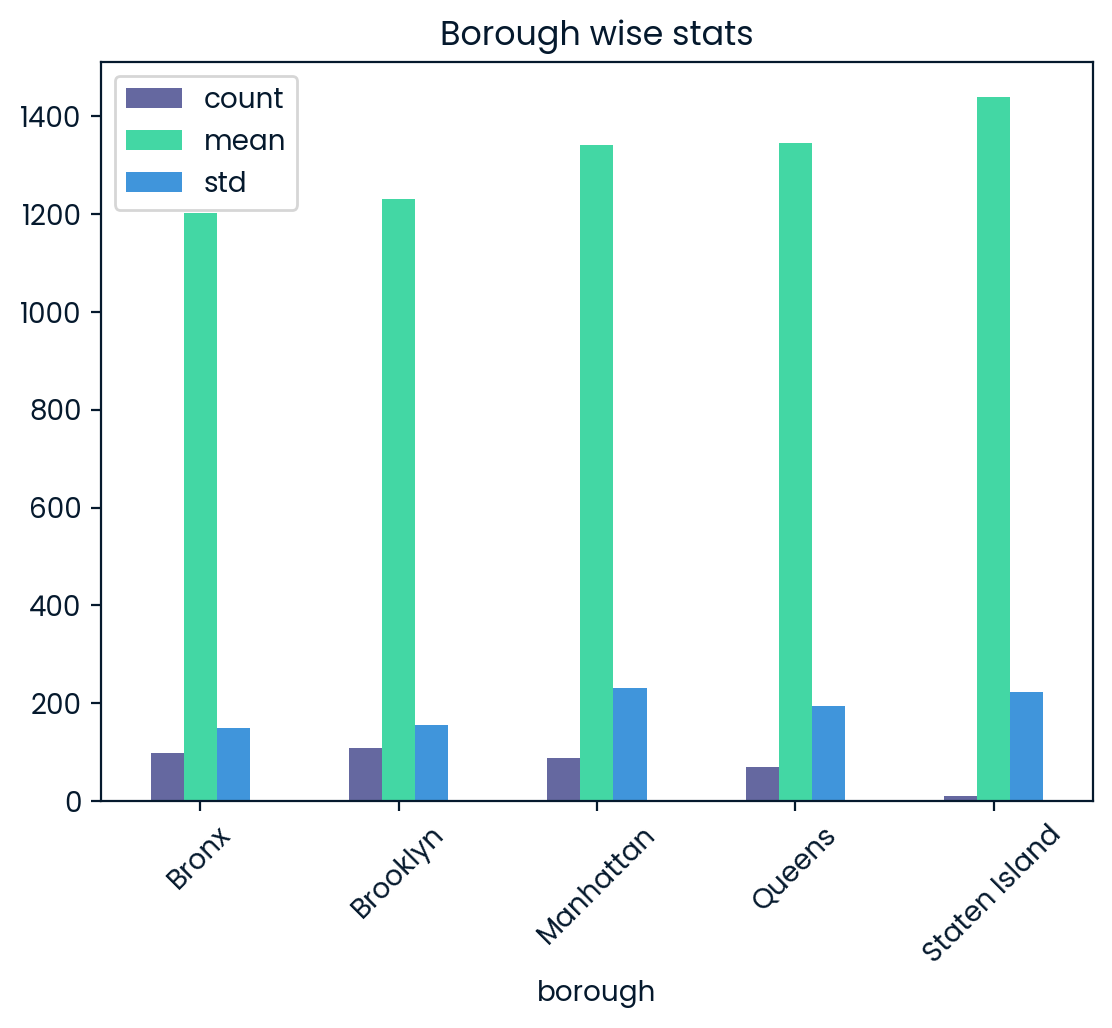

The borough with the largest standard deviation is:
           num_schools  average_SAT  std_SAT
borough                                     
Manhattan           89      1340.13   230.29


In [16]:
# Re-run this cell 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

# Start coding here...
# Which school is best for math?
best_math_schools = schools[schools["average_math"]>=640][["school_name","average_math"]].sort_values("average_math", ascending=False)
print("Best math schools:")
print(best_math_schools.head(10))

# Fixing the error in the following block
best_math_schools_by_borough = schools[schools["average_math"]>=640].groupby("borough")[["school_name", "average_math"]].apply(lambda x: x.sort_values("average_math", ascending=False))
print("Best math schools by borough:")
print(best_math_schools_by_borough.head(10))

# top 10 performing schools
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]
top_10_schools = schools.sort_values("total_SAT",ascending=False)[["school_name","total_SAT"]].head(10)
print("Top 10 performing schools are:")
print(top_10_schools)

# Borough wise stats
borough_stats = schools.groupby("borough")["total_SAT"].agg(["count","mean", "std"]).round(2)
print("Borough wise stats:")
print(borough_stats)
borough_stats.plot(kind="bar", title="Borough wise stats",rot=45)
plt.show()

# which single borough has the largest standard deviation 
largest_std_dev = borough_stats[borough_stats["std"] == borough_stats["std"].max()]

# Rename the columns
largest_std_dev = largest_std_dev.rename(columns={"count":"num_schools","mean":"average_SAT","std":"std_SAT"})
print("The borough with the largest standard deviation is:")
print(largest_std_dev)

The NYC school analysis tells us that the borough with best scores are Queens and Staten Island and the largest variance is Manhattan.